In [1]:
import matplotlib.pyplot as plt
import numpy as np
import importlib
import pandas as pd
import vecenvs

from stable_baselines3 import A2C, PPO
from matplotlib import cm

importlib.reload(vecenvs)

plt.rcParams['figure.dpi'] = 256
plt.rcParams['text.usetex'] = True
plt.rcParams['animation.ffmpeg_path'] = '/Applications/ffmpeg'

np.random.seed(0)

setup_name = 'test'

node_df = pd.read_csv(f'supplychains/{setup_name}/nodes.csv')
edge_df = pd.read_csv(f'supplychains/{setup_name}/edges.csv')

max_time = 10000

supply_nodes = np.array([7, 8])
supply_amounts = 100 * np.random.poisson(10, size=(2, max_time))
supply_prices = 1 * np.ones(shape=(2, max_time))

demand_nodes = np.array([0])
demand_prices = 60.0 * np.ones(shape=(1, max_time))

demand_means = 100 * np.sin(np.pi * np.arange(max_time)/ 1000)**2 + 10
demand_amounts = np.random.poisson(demand_means, size=(max_time,))
demand_amounts = demand_amounts.reshape(1, -1)

supplies = (supply_nodes, supply_amounts, supply_prices)
demands = (demand_nodes, demand_amounts, demand_prices)

fig, ax = plt.subplots()
fig.set_size_inches(8, 2)

ax.plot(demand_amounts[0], color='blue', linewidth=1.0)
ax.plot(demand_means, color='red', linewidth=1.0)

fig.show()
    

/Users/max/Library/Python/3.9/lib/python/site-packages/tensorboard/compat/proto/histogram_pb2.py:18: DeprecationWarning: Call to deprecated create function FileDescriptor(). Note: Create unlinked descriptors is going to go away. Please use get/find descriptors from generated code or query the descriptor_pool.
  DESCRIPTOR = _descriptor.FileDescriptor(
/Users/max/Library/Python/3.9/lib/python/site-packages/tensorboard/compat/proto/histogram_pb2.py:36: DeprecationWarning: Call to deprecated create function FieldDescriptor(). Note: Create unlinked descriptors is going to go away. Please use get/find descriptors from generated code or query the descriptor_pool.
  _descriptor.FieldDescriptor(
/Users/max/Library/Python/3.9/lib/python/site-packages/tensorboard/compat/proto/histogram_pb2.py:29: DeprecationWarning: Call to deprecated create function Descriptor(). Note: Create unlinked descriptors is going to go away. Please use get/find descriptors from generated code or query the descriptor_po

1000: -86.83
2000: -38.68
3000: -69.71
4000: -36.60
5000: -65.60
6000: 7.33
7000: -79.89
8000: -73.79
9000: -98.72
10000: -128.87


/var/folders/v5/b2527n0x4zgb6khjjq0g22k40000gn/T/ipykernel_11075/37627933.py:21: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


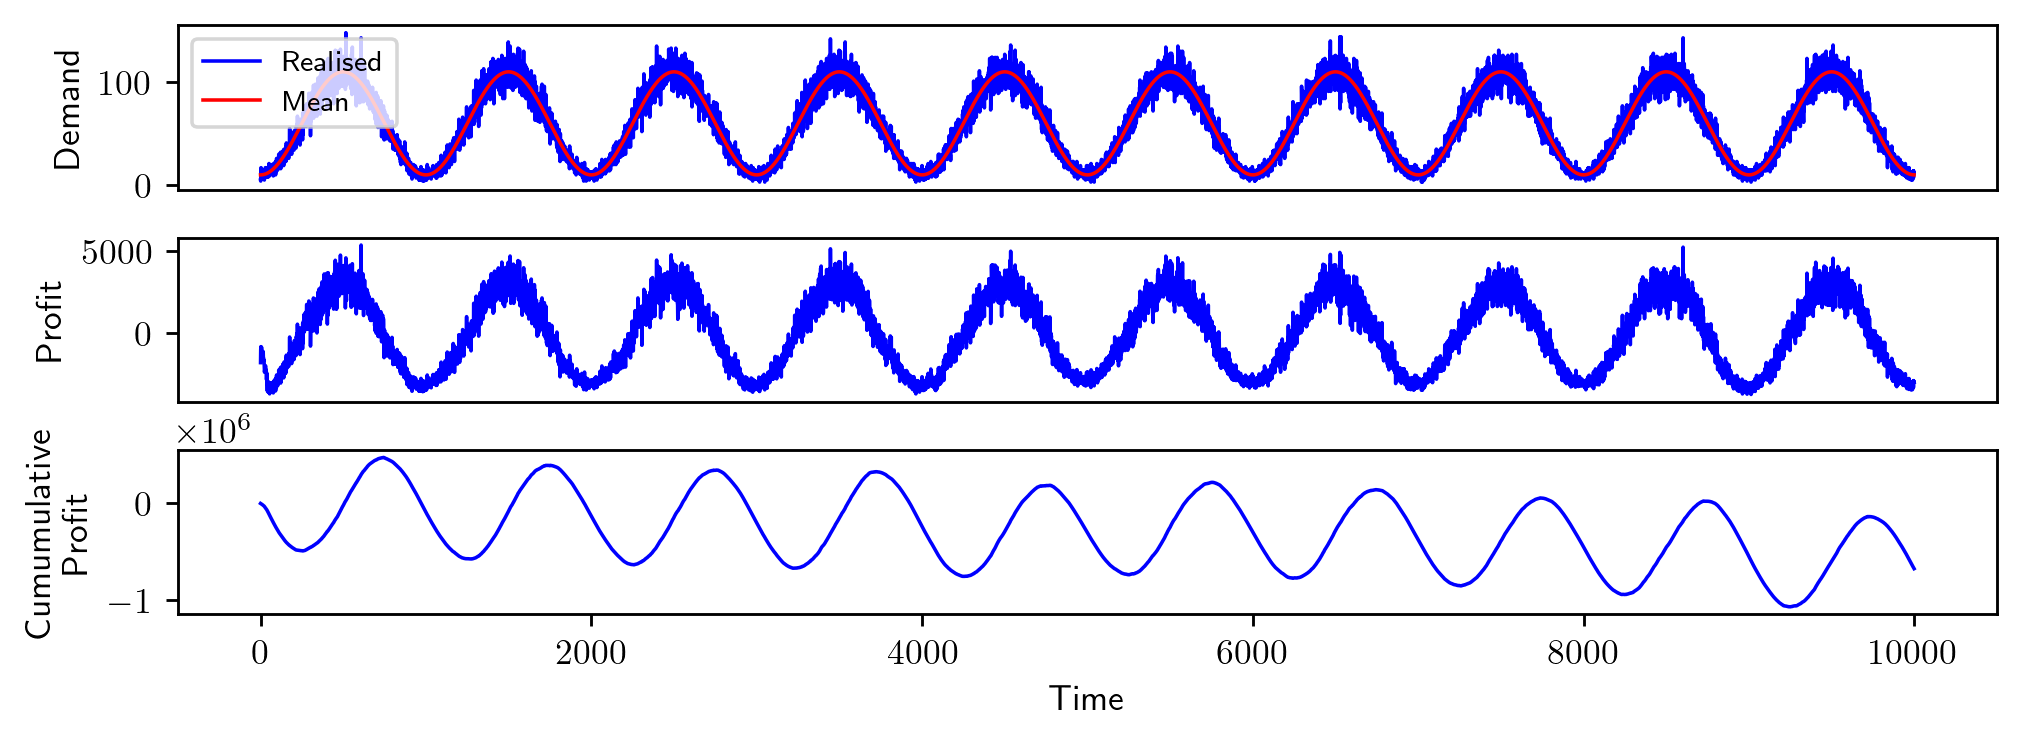

In [2]:
fig, ax = plt.subplots(nrows=3, ncols=1)
fig.set_size_inches(8, 3)

ax[0].plot(demand_amounts[0], color='blue', linewidth=1.0, label='Realised')
ax[0].plot(demand_means, color='red', linewidth=1.0, label='Mean')
ax[1].plot(np.mean(np.sum(env.batch_node_profit_history, axis=-1), axis=0), color='blue', linewidth=1.0)
ax[2].plot(np.cumsum(np.mean(np.sum(env.batch_node_profit_history, axis=-1), axis=0)), color='blue', linewidth=1.0)

ax[0].set_xticks([])
ax[1].set_xticks([])

ax[0].set_ylabel('Demand')
ax[1].set_ylabel('Profit')
ax[2].set_ylabel('Cumumulative \n Profit')

ax[2].set_xlabel('Time')

ax[0].legend(fontsize=8)

fig.tight_layout(h_pad=0, w_pad=0)
fig.show()

In [3]:
step_sizes = [2, 5, 10, 25, 50, 100]
step_sizes_rewards = []
num_envs = 1

for step_size in step_sizes:
    env = vecenvs.VectorisedSupplyChain(node_df, edge_df, supplies, demands, max_time, num_envs=num_envs, update_interval=1000)
    model = PPO('MlpPolicy', env, verbose=0, n_steps=step_size, learning_rate=1e-4, batch_size=step_size*num_envs)
    model.learn(total_timesteps=max_time*num_envs)
    step_sizes_rewards.append(np.mean(np.sum(env.batch_node_profit_history, axis=-1), axis=0))
    print(f'Done step size {step_size}')

1000: -268.50
2000: 88.97
3000: 51.96
4000: 80.50
5000: 305.43
6000: 348.49
7000: 283.96
8000: 206.54
9000: 149.62
10000: 384.75
Done step size 2
1000: -137.35
2000: -383.80
3000: -235.11
4000: 88.77
5000: 267.65
6000: 364.17
7000: 377.35
8000: 101.26
9000: 63.55
10000: -96.11
Done step size 5
1000: 167.79
2000: 251.08
3000: -105.34
4000: 58.04
5000: -336.98
6000: 27.48
7000: 178.97
8000: 280.71
9000: -297.21
10000: -40.43
Done step size 10
1000: 69.55
2000: 272.05
3000: 236.08
4000: 38.25
5000: -170.56
6000: -220.02
7000: 109.84
8000: 103.94
9000: 359.05
10000: -107.68
Done step size 25
1000: 95.12
2000: -92.11
3000: -60.61
4000: -224.04
5000: 51.93
6000: -20.61
7000: 87.11
8000: 192.63
9000: 258.42
10000: -123.44
Done step size 50
1000: -363.11
2000: 61.43
3000: 166.01
4000: 163.35
5000: 119.06
6000: 181.77
7000: 53.61
8000: 255.09
9000: -334.68
10000: -210.17
Done step size 100


step_size 2: 162.99
step_size 5: 40.81
step_size 10: 18.12
step_size 25: 68.69
step_size 50: 16.04
step_size 100: 8.97


/var/folders/v5/b2527n0x4zgb6khjjq0g22k40000gn/T/ipykernel_11075/2233779447.py:30: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


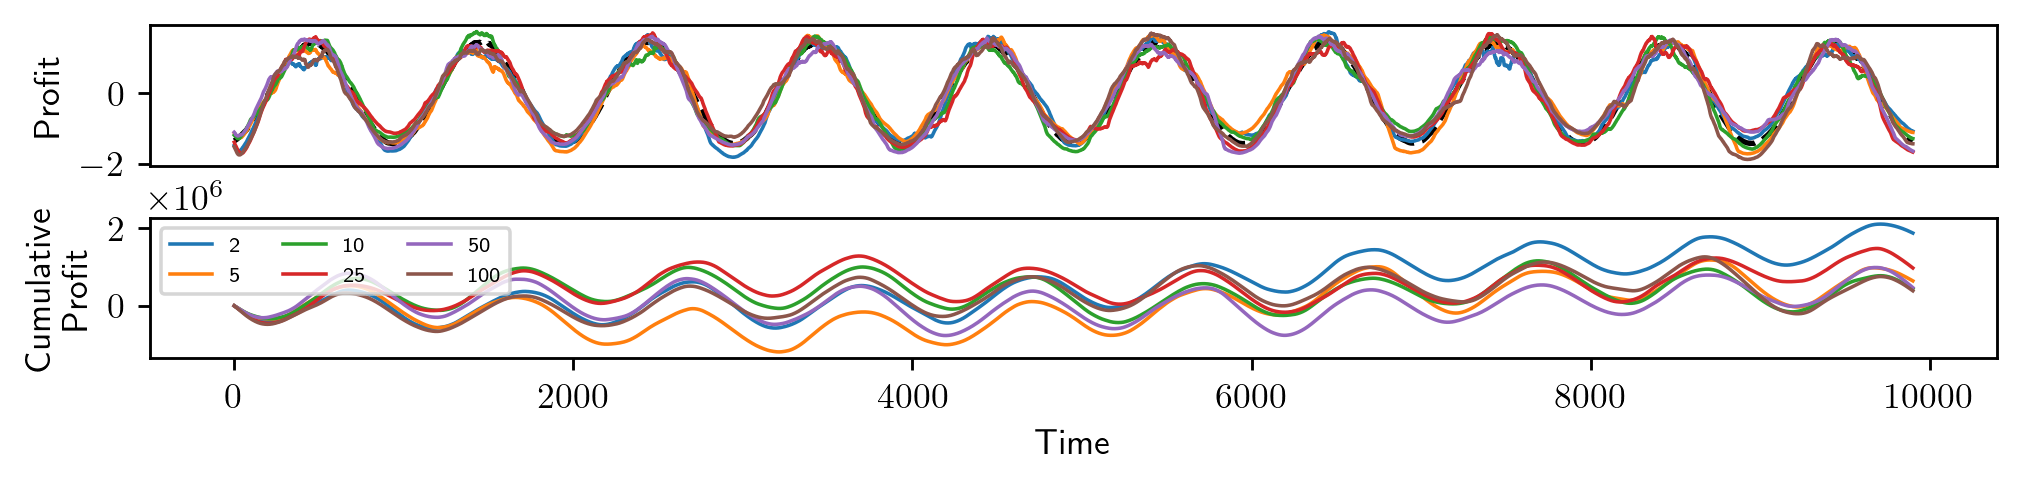

In [4]:
fig, ax = plt.subplots(nrows=2, ncols=1)
fig.set_size_inches(8, 2)

N = 100

x = demand_amounts[0]
x = np.convolve(x, np.ones(N)/N, mode='valid')
x = (x-np.mean(x))/np.std(x)

ax[0].plot(x, color='black', linestyle='--')

for i in range(len(step_sizes)):
    x = step_sizes_rewards[i]
    x = np.convolve(x, np.ones(N)/N, mode='valid')
    z = (x - np.mean(x))/np.std(x)
    
    ax[0].plot(z, linewidth=1.0, alpha=1.0, label=step_sizes[i])
    ax[1].plot(np.cumsum(x), linewidth=1.0, alpha=1.0, label=step_sizes[i])

    reward_per_timestep = np.sum(step_sizes_rewards[i]) / max_time
    print(f'step_size {step_sizes[i]}: {reward_per_timestep:.2f}')

ax[0].set_ylabel('Profit')
ax[1].set_ylabel('Cumulative \n Profit')
ax[1].set_xlabel('Time')
ax[0].set_xticks([])
ax[1].legend(fontsize=6, loc='upper left', ncols=3)

fig.tight_layout(h_pad=0)
fig.show()

In [5]:
batch_sizes = [1, 25, 50]
batch_sizes_rewards = []
num_steps = 2

for i in range(len(batch_sizes)):
    env = vecenvs.VectorisedSupplyChain(node_df, edge_df, supplies, demands, max_time, batch_sizes[i], 
                                        update_interval=1000, demand_window_size=32)
    model = PPO('MlpPolicy', env, verbose=0, n_steps=num_steps, learning_rate=1e-4)
    model.learn(total_timesteps=max_time*batch_sizes[i])
    batch_sizes_rewards.append(np.mean(np.sum(env.batch_node_profit_history, axis=-1), axis=0))
    print(f'Done batch size {batch_sizes[i]}')

/Users/max/Library/Python/3.9/lib/python/site-packages/stable_baselines3/ppo/ppo.py:137: UserWarning: You have specified a mini-batch size of 64, but because the `RolloutBuffer` is of size `n_steps * n_envs = 2`, after every 0 untruncated mini-batches, there will be a truncated mini-batch of size 2
We recommend using a `batch_size` that is a factor of `n_steps * n_envs`.
Info: (n_steps=2 and n_envs=1)
  warnings.warn(


1000: 105.71
2000: -157.51
3000: 166.73
4000: 322.03
5000: 426.14
6000: 234.52
7000: 349.27
8000: 304.10
9000: 272.34
10000: 23.65
Done batch size 1


/Users/max/Library/Python/3.9/lib/python/site-packages/stable_baselines3/ppo/ppo.py:137: UserWarning: You have specified a mini-batch size of 64, but because the `RolloutBuffer` is of size `n_steps * n_envs = 50`, after every 0 untruncated mini-batches, there will be a truncated mini-batch of size 50
We recommend using a `batch_size` that is a factor of `n_steps * n_envs`.
Info: (n_steps=2 and n_envs=25)
  warnings.warn(


1000: 57.08
2000: 352.60
3000: 678.50
4000: 917.46
5000: 1248.04
6000: 1842.44
7000: 2191.34
8000: 1316.73
9000: 276.56
10000: 85.21
Done batch size 25


/Users/max/Library/Python/3.9/lib/python/site-packages/stable_baselines3/ppo/ppo.py:137: UserWarning: You have specified a mini-batch size of 64, but because the `RolloutBuffer` is of size `n_steps * n_envs = 100`, after every 1 untruncated mini-batches, there will be a truncated mini-batch of size 36
We recommend using a `batch_size` that is a factor of `n_steps * n_envs`.
Info: (n_steps=2 and n_envs=50)
  warnings.warn(


1000: 133.99
2000: 495.64
3000: 891.01
4000: 1590.70
5000: 2260.99
6000: 1548.16
7000: 776.00
8000: 83.70
9000: 17.20
10000: 5.27
Done batch size 50


batch_size 1: 204.49
batch_size 25: 896.59
batch_size 50: 780.25


/var/folders/v5/b2527n0x4zgb6khjjq0g22k40000gn/T/ipykernel_11075/2124226829.py:27: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


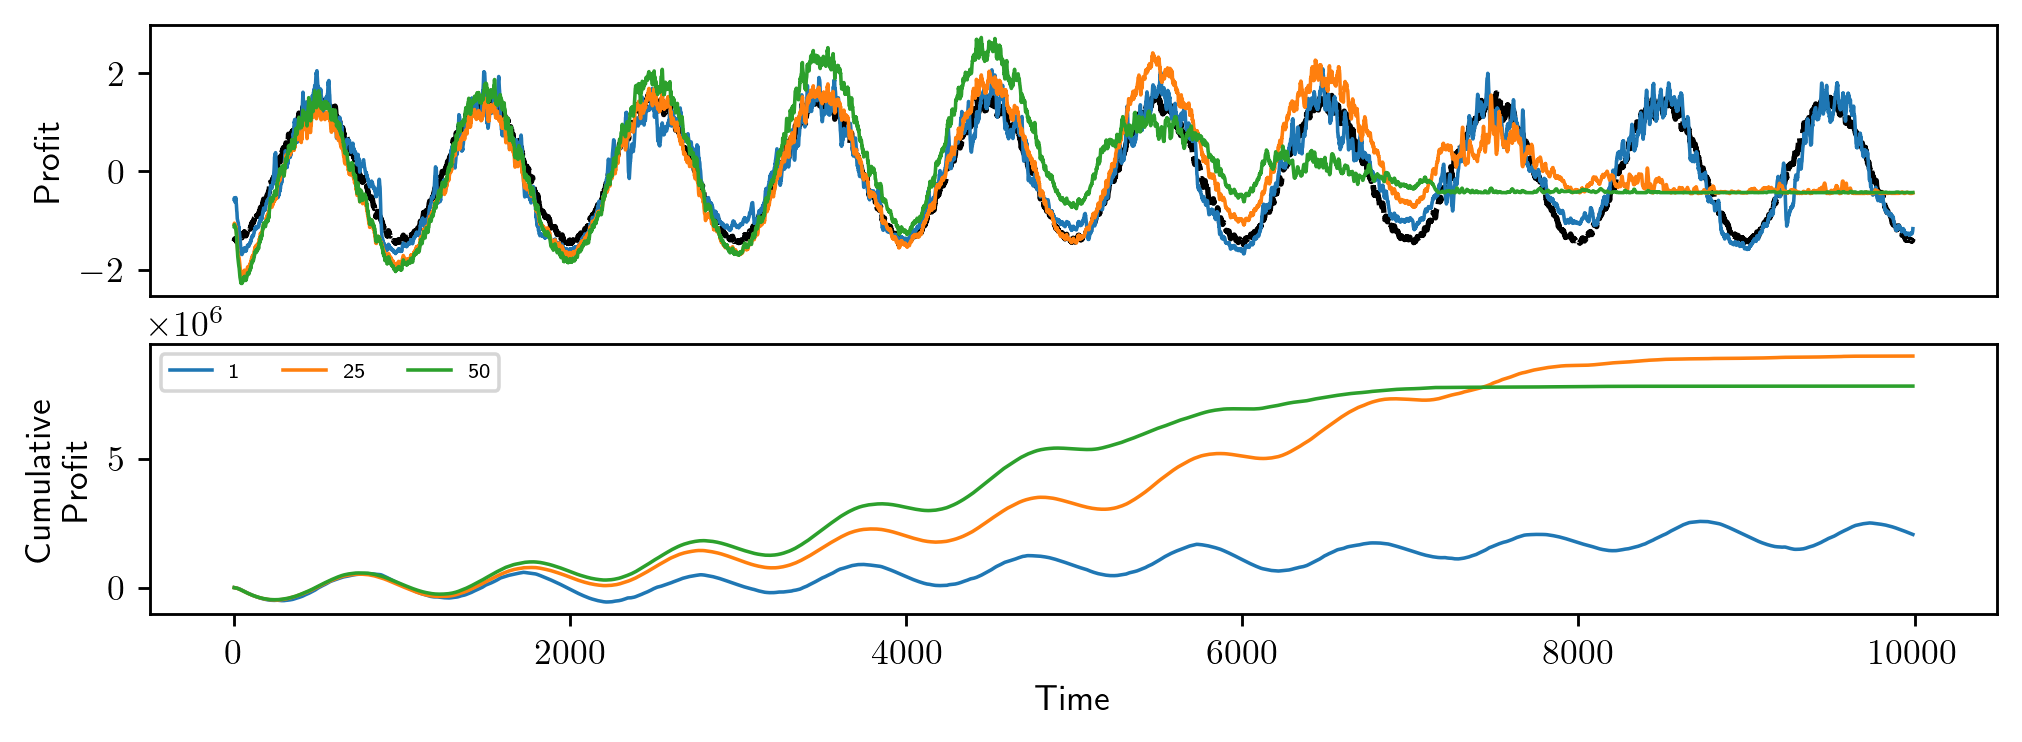

In [6]:
fig, ax = plt.subplots(nrows=2, ncols=1)
fig.set_size_inches(8, 3)

N = 10

x = demand_amounts[0]
x = np.convolve(x, np.ones(N)/N, mode='valid')
ax[0].plot((x-np.mean(x))/np.std(x), color='black', linestyle='--')

for i in range(len(batch_sizes)):
    x = batch_sizes_rewards[i]
    x = np.convolve(x, np.ones(N)/N, mode='valid')
    z = (x - np.mean(x))/np.std(x)
    ax[0].plot(z, linewidth=1.0, alpha=1.0, label=batch_sizes[i])
    ax[1].plot(np.cumsum(x), linewidth=1.0, alpha=1.0, label=batch_sizes[i])

    reward_per_timestep = np.sum(batch_sizes_rewards[i]) / max_time
    print(f'batch_size {batch_sizes[i]}: {reward_per_timestep:.2f}')

ax[0].set_ylabel('Profit')
ax[1].set_ylabel('Cumulative \n Profit')
ax[1].set_xlabel('Time')
ax[0].set_xticks([])
ax[1].legend(fontsize=6, loc='upper left', ncols=3)

fig.tight_layout(h_pad=0)
fig.show()

In [11]:
num_epochs = 10
epoch_rewards = []

env = vecenvs.VectorisedSupplyChain(node_df, edge_df, supplies, demands, max_time, 1, update_interval=2000)
model = PPO('MlpPolicy', env, verbose=0, n_steps=2)

for epoch in range(num_epochs):
    env.reset()
    model.learn(total_timesteps=max_time)
    epoch_rewards.append(np.mean(np.sum(env.batch_node_profit_history, axis=-1), axis=0))
    print(f'Done epoch {epoch+1}/{num_epochs}')

2000: 115.51
4000: 542.06
6000: 823.33
8000: 130.45
10000: -2286.67
Done epoch 1/10
2000: -3355.83
4000: -3336.69
6000: -3224.81
8000: -3237.70
10000: -3237.70
Done epoch 2/10
2000: -4360.30
4000: -4360.30
6000: -4360.30
8000: -4360.30
10000: -4360.30
Done epoch 3/10
2000: -3032.40
4000: -3032.40
6000: -3032.40
8000: -3032.40
10000: -3032.40
Done epoch 4/10
2000: -3296.00
4000: -3296.00
6000: -3296.00
8000: -3296.00
10000: -3296.00
Done epoch 5/10
2000: -3888.20
4000: -3888.20
6000: -3888.20
8000: -3888.20
10000: -3319.73
Done epoch 6/10
2000: -1838.80
4000: -1845.89
6000: -2391.00
8000: -2391.00
10000: -2619.53
Done epoch 7/10
2000: -3022.55
4000: -2726.00
6000: -2726.00
8000: -2512.92
10000: 1076.21
Done epoch 8/10
2000: 255.43
4000: -3648.17
6000: -3646.80
8000: -3646.80
10000: -3668.97
Done epoch 9/10
2000: -3789.60
4000: -3855.70
6000: -3889.60
8000: -3332.69
10000: 291.86
Done epoch 10/10


In [12]:
demand_amounts_extended = np.repeat(demand_amounts, num_epochs, axis=0).reshape(1, -1)
demand_prices_extended = np.repeat(demand_prices, num_epochs, axis=0).reshape(1, -1)

supply_amounts_extended = np.repeat(supply_amounts, num_epochs, axis=0).reshape(2, -1)
supply_prices_extended = np.repeat(supply_prices, num_epochs, axis=0).reshape(2, -1)

supplies_extended = (supply_nodes, supply_amounts_extended, supply_prices_extended)
demands_extended = (demand_nodes, demand_amounts_extended, demand_prices_extended)

In [13]:
env_extended = vecenvs.VectorisedSupplyChain(node_df, edge_df, supplies_extended, demands_extended, 
                                             max_time * num_epochs, 1, update_interval=2000)

model_extended = PPO('MlpPolicy', env_extended, verbose=0, n_steps=2)
model_extended.learn(total_timesteps=max_time * num_epochs)

2000: 396.95
4000: -369.21
6000: -322.45
8000: -27.65
10000: 5.04
12000: 121.81
14000: -2335.11
16000: -1709.41
18000: -359.74
20000: -640.02
22000: -473.23
24000: 318.48
26000: -1667.88
28000: -1964.50
30000: -1964.50
32000: -1964.50
34000: -1964.50
36000: -1964.50
38000: -1964.50
40000: 125.78
42000: 20.50
44000: -414.68
46000: 20.06
48000: -2564.26
50000: -2789.30
52000: -2789.30
54000: -2789.30
56000: -2789.30
58000: -2789.30
60000: -2789.30
62000: -2855.13
64000: -2608.11
66000: -1202.98
68000: -2239.18
70000: -2221.27
72000: -1402.76
74000: -1536.30
76000: -1323.18
78000: -1364.98
80000: -1486.70
82000: -1446.58
84000: -1436.22
86000: -1495.79
88000: -1470.41
90000: -1470.60
92000: -1370.20
94000: -1437.33
96000: -1486.70
98000: -1470.75
100000: -1450.71


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/var/folders/v5/b2527n0x4zgb6khjjq0g22k40000gn/T/ipykernel_11075/3910821952.py:32: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


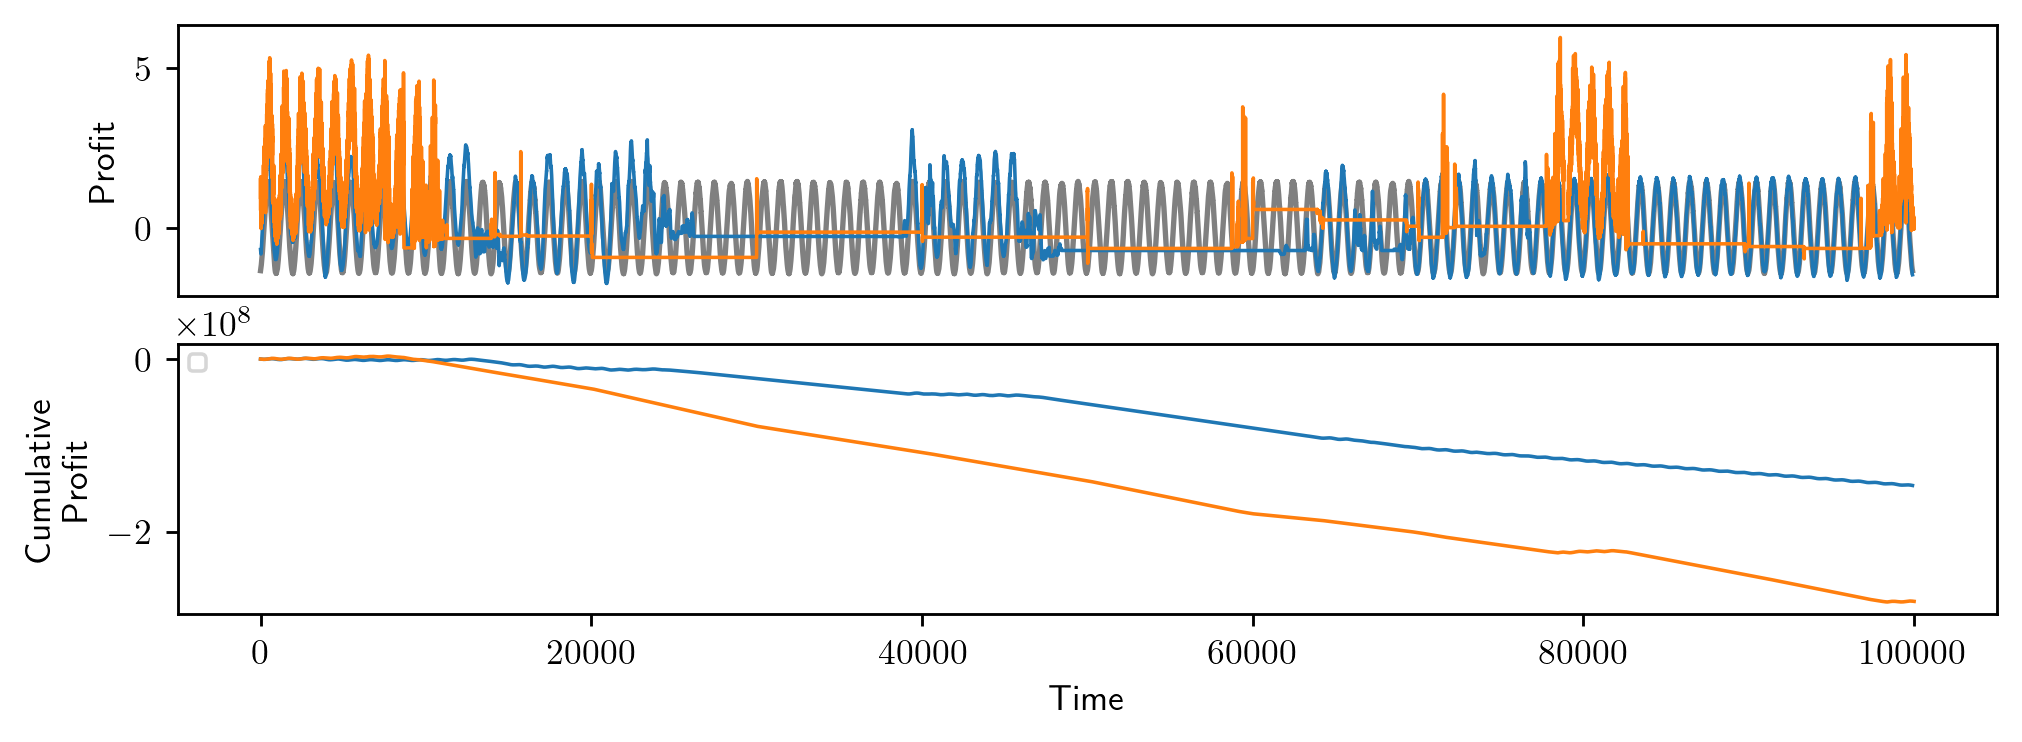

In [14]:
fig, ax = plt.subplots(nrows=2, ncols=1)
fig.set_size_inches(8, 3)

N = 100

x = demand_amounts_extended[0]
x = np.convolve(x, np.ones(N)/N, mode='valid')
x = (x-np.mean(x))/np.std(x)
ax[0].plot(x, color='gray')

x = np.mean(np.sum(env_extended.batch_node_profit_history, axis=-1), axis=0)
x = np.convolve(x, np.ones(N)/N, mode='valid')
z = (x - np.mean(x))/np.std(x)

ax[0].plot(z, linewidth=1.0, alpha=1.0)
ax[1].plot(np.cumsum(x), linewidth=1.0, alpha=1.0)

x = np.array(epoch_rewards)
x = np.reshape(x, max_time * num_epochs)
z = (x - np.mean(x))/np.std(x)

ax[0].plot(z, linewidth=1.0, alpha=1.0)
ax[1].plot(np.cumsum(x), linewidth=1.0, alpha=1.0)

ax[0].set_ylabel('Profit')
ax[1].set_ylabel('Cumulative \n Profit')
ax[1].set_xlabel('Time')
ax[0].set_xticks([])
ax[1].legend(fontsize=6, loc='upper left', ncols=3)

fig.tight_layout(h_pad=0)
fig.show()